# Efficient Frontier

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("data/ind30_m_vw_rets.csv",
                header=0, index_col=0, parse_dates=True)
df = df/100
df.index = pd.to_datetime(df.index, format="%Y%m")
df.index = df.index.to_period("M")
df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
df.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

### We need to remove extra space from column end

In [7]:
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [12]:
df.Food.shape

(1110,)

In [13]:
df.shape

(1110, 30)

In [75]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import Edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
df = erk.industry_return()
df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


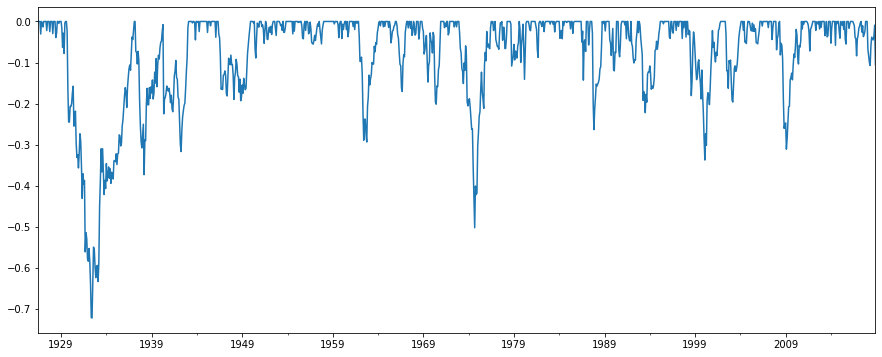

In [26]:
erk.drawdown(df.Food).Drawdowns.plot.line(figsize=(15,6))

In [32]:
erk.var_gaussian(df[df.columns[1:6]], modified=True)

Beer     0.042306
Smoke    0.080292
Games    0.102076
Books    0.089362
Hshld    0.065198
dtype: float64

In [45]:
erk.var_gaussian(df, modified=True).sort_values().head()

Beer     0.042306
Food     0.061211
Telcm    0.064720
Coal     0.064981
Hshld    0.065198
dtype: float64

### plotting Cornish-Fisher Distribution for All Industries

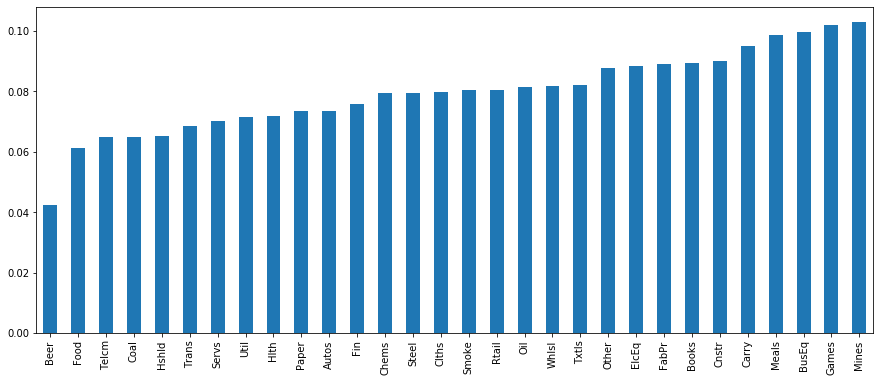

In [34]:
erk.var_gaussian(df, modified=True).sort_values().plot.bar(figsize=(15,6))

### Sharp ratio : riskfree rate 0.03 and period 12(Annual)

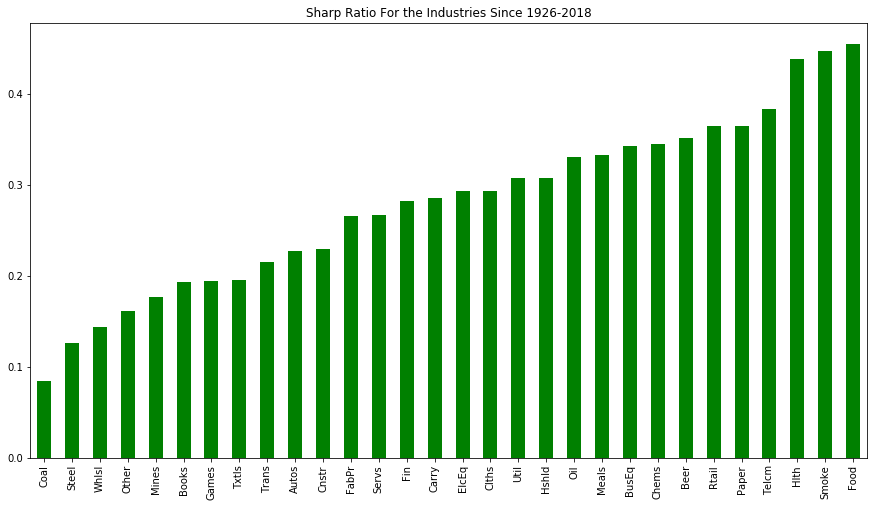

In [41]:
erk.sharp_ratio(df, 12, 0.03).sort_values().plot.bar(title="Sharp Ratio For the Industries Since 1926-2018",figsize=(15,8),color="green")

### Plotting Annualized Return For 1995 to 2000

In [50]:
ar = erk.periodic_returns(df["1996":"2000"], 12)

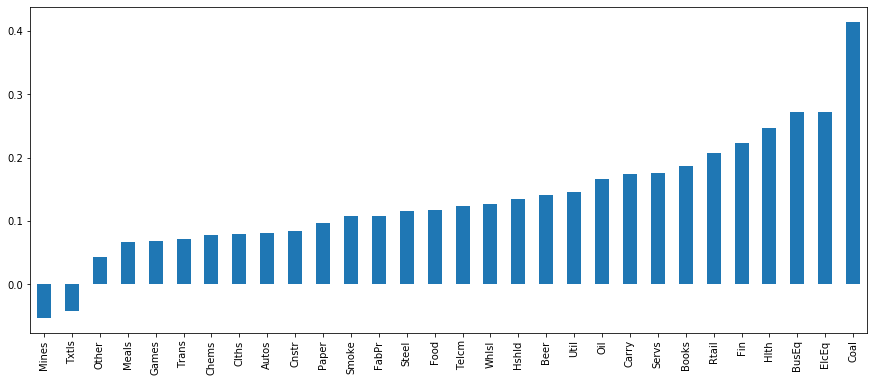

In [51]:
ar.sort_values().plot.bar(figsize=(15,6))

In [52]:
cov = df["1996":"2000"].cov()

In [53]:
cov.shape

(30, 30)

In [54]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


### Covarience Matrix Diagonal Elements are basically Varience of the levels

In [74]:
np.array([[1,2,3],[2,3,4]]).T

array([[1, 2],
       [2, 3],
       [3, 4]])

In [71]:
def portfolio_return(weights, returns):
    """
    weights -> returns
    
    """
    return weight.T @ returns

def portfolio_volatility(weight, cov):
    """
    weights -> vol
    
    """
    return (weights.T @ cov @ weight)**0.5

In [96]:
l = ["Food","Beer","Smoke","Coal"]
ar[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [64]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [77]:
weights = np.repeat(1/4,4)
erk.portfolio_return(weights, ar[l])

0.19511097196038385

In [78]:
erk.portfolio_volatility(weights, cov.loc[l,l])

0.055059195776437045

# 2 Asset frontier

In [82]:
l = ["Games","Fin"]   # these are columns based on which we ae going to analyze 2 asset frontier


In [83]:
# We are going to set some pre defined bunch of weights 
n_weights = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_weights)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [88]:
rets = [erk.portfolio_return(w, ar[l]) for w in weights]
#calculates all the returns aka Frontier Points for all the weights available
volatility = [erk.portfolio_volatility(w, cov.loc[l,l]) for w in weights]
#Calculates Volatility 
df1 = pd.DataFrame({
    "Portfolio returns": rets,
    "Volatility": volatility
})

In [90]:
df1.head()

,Portfolio returns,Volatility
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753


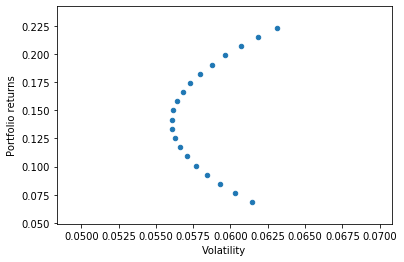

In [94]:
df1.plot.scatter(x=df1.columns[1], y=df1.columns[0])

In [93]:
def plot_2asset_frontier(n_weights: int, expected_return, cov):
    """
    Creating a plot for 2 Asset Frontier using expected return Covarience matrix
    
    """
    if expected_return.shape[0] != 2:
        raise ValueError("plot 2 Asset Frontier ")

'Volatility'